# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#paso2
header = {'User-Agent': 'my-app/0.0.1'}
resource_url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(resource_url, time.sleep(3), headers= header)
response

<Response [200]>

In [68]:
#paso3
if response:
    soup = BeautifulSoup(response.text, 'html.parser')
    #tables = soup.find('table')
    #tables
    tables = pd.read_html(str(soup))
    #print(len(tables))
    #print(tables[0].head())
df = tables[0]
df.head()

/tmp/ipykernel_637/1386309473.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.063,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.583,6 January 2017,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.130,21 September 2016,[3]
3,4,"""Someone You Loved""",Lewis Capaldi,4.079,8 November 2018,[4]
4,5,"""Sweater Weather""",The Neighbourhood,4.073,3 December 2012,[5]


In [69]:
#paso4
df['Streams (billions)'] = pd.to_numeric(df['Streams (billions)'], errors='coerce')
df['Release date'] = pd.to_datetime(df['Release date'], errors ='coerce')
df = df.dropna(subset=['Streams (billions)', 'Release date'])
df['Release date'] = df['Release date'].dt.strftime('%d/%m/%Y')
df = df.drop(columns=['Ref.'])
df

/tmp/ipykernel_637/4167042465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release date'] = df['Release date'].dt.strftime('%d/%m/%Y')


,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,5.063,29/11/2019
1,2,"""Shape of You""",Ed Sheeran,4.583,06/01/2017
2,3,"""Starboy""",The Weeknd and Daft Punk,4.130,21/09/2016
3,4,"""Someone You Loved""",Lewis Capaldi,4.079,08/11/2018
4,5,"""Sweater Weather""",The Neighbourhood,4.073,03/12/2012
...,...,...,...,...,...
95,96,"""Clean Baby Sleep White Noise (Loopable)""",Dream Supplier,2.437,29/04/2020
96,97,"""Sweet Child O' Mine""",Guns N' Roses,2.432,03/06/1988
97,98,"""Creep""",Radiohead,2.429,21/09/1992
98,99,"""Levitating""",Dua Lipa and DaBaby,2.427,01/10/2020


In [5]:
#Paso 5
dfsql = sqlite3.connect('spotify_top_canciones.db')
df.to_sql('mas_sonados', dfsql, if_exists = 'replace', index= False)
cursor = dfsql.cursor()
dfsql.commit()
#dfsql.close()

In [6]:
#Paso 6. Mostrar los resultados
cursor.execute("SELECT * FROM mas_sonados")
result = cursor.fetchall()
for row in result:
    print(row)

('1', '"Blinding Lights"', 'The Weeknd', '5.063', '29/11/2019')
('2', '"Shape of You"', 'Ed Sheeran', '4.583', '06/01/2017')
('3', '"Starboy"', 'The Weeknd and Daft Punk', '4.130', '21/09/2016')
('4', '"Someone You Loved"', 'Lewis Capaldi', '4.079', '08/11/2018')
('5', '"Sweater Weather"', 'The Neighbourhood', '4.073', '03/12/2012')
('6', '"As It Was"', 'Harry Styles', '4.064', '01/04/2022')
('7', '"Sunflower"', 'Post Malone and Swae Lee', '3.979', '18/10/2018')
('8', '"One Dance"', 'Drake with Wizkid and Kyla', '3.818', '05/04/2016')
('9', '"Stay"', 'The Kid Laroi and Justin Bieber', '3.684', '09/07/2021')
('10', '"Perfect"', 'Ed Sheeran', '3.650', '03/03/2017')
('11', '"Believer"', 'Imagine Dragons', '3.602', '01/02/2017')
('12', '"Heat Waves"', 'Glass Animals', '3.544', '29/06/2020')
('13', '"Lovely"', 'Billie Eilish and Khalid', '3.487', '19/04/2018')
('14', '"Closer"', 'The Chainsmokers and Halsey', '3.438', '29/07/2016')
('15', '"Say You Won\'t Let Go"', 'James Arthur', '3.417', 

In [70]:
#Preparar los datos para la visualización
df_top10 = df.sort_values(by='Streams (billions)', ascending=False).head(10)
df_top10['Streams (billions)'].dtype
df_top10

,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,5.063,29/11/2019
1,2,"""Shape of You""",Ed Sheeran,4.583,06/01/2017
2,3,"""Starboy""",The Weeknd and Daft Punk,4.130,21/09/2016
3,4,"""Someone You Loved""",Lewis Capaldi,4.079,08/11/2018
4,5,"""Sweater Weather""",The Neighbourhood,4.073,03/12/2012
5,6,"""As It Was""",Harry Styles,4.064,01/04/2022
6,7,"""Sunflower""",Post Malone and Swae Lee,3.979,18/10/2018
7,8,"""One Dance""",Drake with Wizkid and Kyla,3.818,05/04/2016
8,9,"""Stay""",The Kid Laroi and Justin Bieber,3.684,09/07/2021
9,10,"""Perfect""",Ed Sheeran,3.650,03/03/2017


/tmp/ipykernel_637/2057451106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Song', y='Streams (billions)', data= df_top10, palette='viridis')


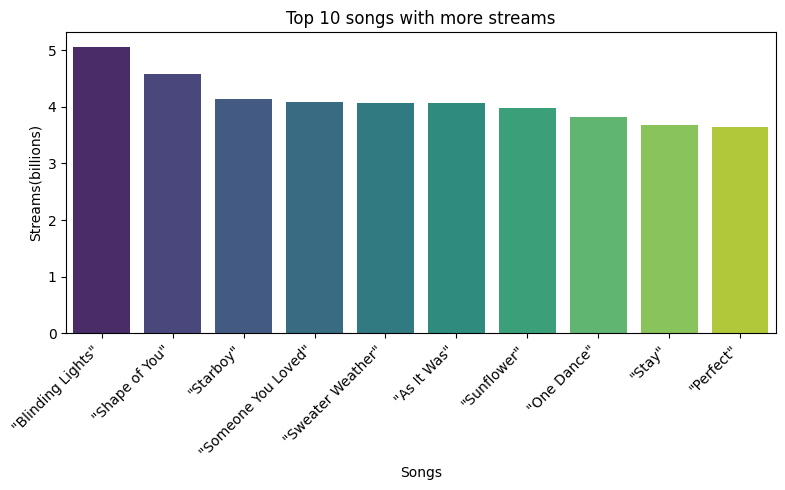

In [71]:
#Paso 6. Gráfico de barras con Matplotlip i Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x='Song', y='Streams (billions)', data= df_top10, palette='viridis')
plt.title('Top 10 songs with more streams')
plt.xlabel('Songs')
plt.ylabel('Streams(billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [115]:
df['Release date'] = pd.to_datetime(df['Release date'], dayfirst=True)
df_time_sorted = df.sort_values(by='Release date', ascending=False).head(10)
df_time_sorted

,Rank,Song,Artist(s),Streams (billions),Release date
32,33,"""Die with a Smile""",Lady Gaga and Bruno Mars,3.029,2024-08-16
29,30,"""Birds of a Feather""",Billie Eilish,3.092,2024-05-17
79,80,"""Espresso""",Sabrina Carpenter,2.565,2024-04-11
84,85,"""Beautiful Things""",Benson Boone,2.505,2024-01-19
76,77,"""Seven""",Jung Kook and Latto,2.576,2023-07-14
64,65,"""Flowers""",Miley Cyrus,2.676,2023-01-13
72,73,"""Kill Bill""",SZA,2.614,2022-12-09
5,6,"""As It Was""",Harry Styles,4.064,2022-04-01
83,84,"""Cold Heart (Pnau remix)""",Elton John and Dua Lipa with Pnau,2.511,2021-08-13
8,9,"""Stay""",The Kid Laroi and Justin Bieber,3.684,2021-07-09


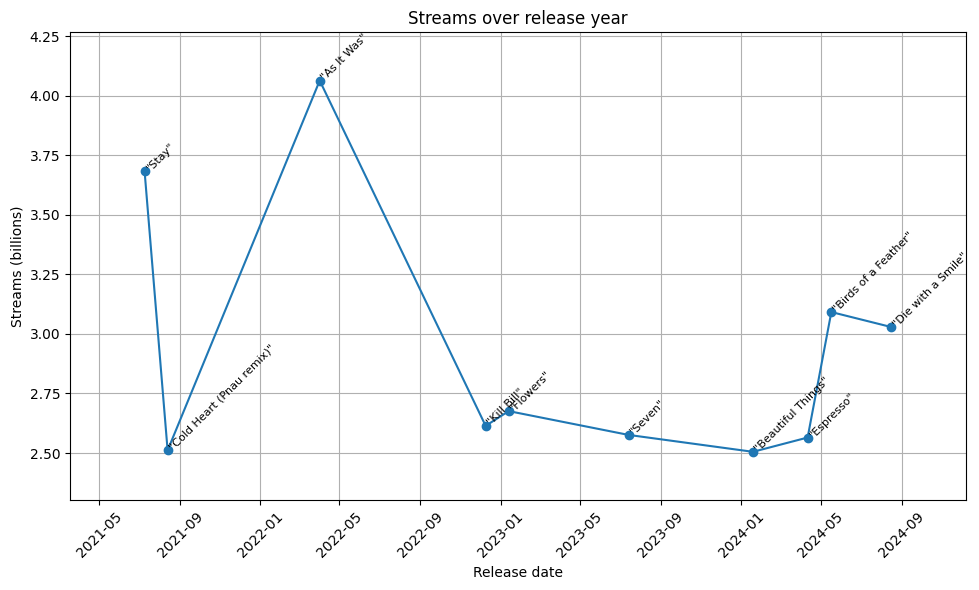

In [ ]:
#Paso 6. Gráfico de líneas para ver como evolucionan los streams según las fechas de lanzamiento.
df['Streams (billions)'] = df['Streams (billions)'].astype(float)

df['Release date'] = pd.to_datetime(df['Release date'], dayfirst=True)
df_time_sorted = df.sort_values(by='Release date', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.plot(df_time_sorted['Release date'], df_time_sorted['Streams (billions)'], marker='o', linestyle='-')
plt.title('Streams over release year')
plt.xlabel('Release date')
plt.ylabel('Streams (billions)')
plt.grid(True)
plt.xticks(rotation=45)

for i, song in enumerate(df_time_sorted['Song']):
    plt.annotate(song, (df_time_sorted['Release date'].iloc[i], df_time_sorted['Streams (billions)'].iloc[i]), fontsize=8, rotation= 45)

plt.margins(x=0.1, y=0.13)
plt.tight_layout()
plt.show()


